# Twitter Network Analysis
### Online Social Network Analysis: Project 1
- Chandni Patel (A20455322)
- Omkar Pawar (A20448804)

A lot of people use Twitter as their primary source of sharing information. It is a good source to acquire knowledge about any domain that we wish. Most of the user profiles are public, so scraping data from  twitter is easy and has fewer restrictions. All the information on twitter is publicly available and can be accessed using Twitter API. 

### Notes to run the code below
- Update the twitter api keys below for authentication. Put your own keys to make the api calls
- Run each cell to get the output for lines of code. 

In [1]:
# Import Essential Libraries
import twitter
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import math
import itertools
import time

In [2]:
# Create authentication for twitter developer account using twitter library for python 
api = twitter.Api(consumer_key='hQqVc0baZHhIvdZehOB44cTPZ',
                  consumer_secret='W88veO7CCaKnewU9SP4sybEJJGNXVKRehDjvJgFCWjBkjJM22C',
                  access_token_key='4199714533-2nDVh4hv3RqDfIgYxFpJ6EuvylGAHT7ueLBOh43',
                  access_token_secret='diROtrKxoAdPP0DqcW7nxYsv2SjSZKaiSxBgr8XszgBj1')

In [3]:
# Function to get list of friends for the specified user.
def get_friends_list(user_screen_name):
    '''
    Params
    user_screen_name: Screen name of the person whose friends list needed

    Return
    List of friends of the user requested
    '''
    #Get data using twitter api. Returns list of (user_id,screen_name)
    Friends = api.GetFriends(screen_name = user_screen_name)
    
    #Empty list for adding tuple with user screen_name and friends screen_name
    list_of_friends = []

    for i in Friends:
        list_of_friends.append((user_screen_name,i.screen_name))
    
    return list_of_friends

In [4]:
# Function to get top 50 friends of specified user.
# Top friends are those who have highest number of followers.
def get_top_50_friends(screenname):
    user_screen_name = get_friends_list(screenname)
    
    user_df = pd.DataFrame(user_screen_name)
    user_df.columns = ["Users","Follows"]
    
    list_of_user_friends = user_df.Follows.tolist()
    
    lookup_for_user_friends = []
    number_of_users_per_request = 99

    for i in range(math.ceil(len(list_of_user_friends)/100)):
    
        start = number_of_users_per_request*i
        end = start+number_of_users_per_request
        list_for_api = list_of_user_friends[start:end]

        lookup_for_user_friends.append(api.UsersLookup(screen_name=list_for_api,return_json = True))
    
    lookup = (list(itertools.chain.from_iterable(lookup_for_user_friends)))

    to_filter = []
    for objects in lookup:
        to_filter.append((screenname,objects["screen_name"],objects["followers_count"]))
    
    to_filter.sort(key = lambda x: x[2],reverse = True)
    
    return to_filter[:50]

In [5]:
# Get TSeries Data
Tseries = get_top_50_friends("TSeries")

In [6]:
Tseries

[('TSeries', 'YouTube', 72174488),
 ('TSeries', 'Twitter', 58334378),
 ('TSeries', 'jimmyfallon', 51650350),
 ('TSeries', 'nytimes', 47358702),
 ('TSeries', 'SrBachchan', 44350729),
 ('TSeries', 'BeingSalmanKhan', 41546262),
 ('TSeries', 'iamsrk', 41112296),
 ('TSeries', 'akshaykumar', 39245581),
 ('TSeries', 'sachin_rt', 34041881),
 ('TSeries', 'iHrithik', 29714237),
 ('TSeries', 'deepikapadukone', 27722541),
 ('TSeries', 'priyankachopra', 26647764),
 ('TSeries', 'aamir_khan', 26430949),
 ('TSeries', 'arrahman', 23370767),
 ('TSeries', 'AnushkaSharma', 22047959),
 ('TSeries', 'aliaa08', 20701386),
 ('TSeries', 'AnupamPKher', 18001389),
 ('TSeries', 'karanjohar', 17257349),
 ('TSeries', 'juniorbachchan', 15370471),
 ('TSeries', 'shahidkapoor', 15293112),
 ('TSeries', 'Asli_Jacqueline', 14742923),
 ('TSeries', 'TwitterVideo', 14318165),
 ('TSeries', 'ParineetiChopra', 13824032),
 ('TSeries', 'RanveerOfficial', 13791866),
 ('TSeries', 'ajaydevgn', 13705536),
 ('TSeries', 'ShraddhaKapoor'

In [7]:
to_filter = [i[0:2] for i in Tseries ]
to_filter

[('TSeries', 'YouTube'),
 ('TSeries', 'Twitter'),
 ('TSeries', 'jimmyfallon'),
 ('TSeries', 'nytimes'),
 ('TSeries', 'SrBachchan'),
 ('TSeries', 'BeingSalmanKhan'),
 ('TSeries', 'iamsrk'),
 ('TSeries', 'akshaykumar'),
 ('TSeries', 'sachin_rt'),
 ('TSeries', 'iHrithik'),
 ('TSeries', 'deepikapadukone'),
 ('TSeries', 'priyankachopra'),
 ('TSeries', 'aamir_khan'),
 ('TSeries', 'arrahman'),
 ('TSeries', 'AnushkaSharma'),
 ('TSeries', 'aliaa08'),
 ('TSeries', 'AnupamPKher'),
 ('TSeries', 'karanjohar'),
 ('TSeries', 'juniorbachchan'),
 ('TSeries', 'shahidkapoor'),
 ('TSeries', 'Asli_Jacqueline'),
 ('TSeries', 'TwitterVideo'),
 ('TSeries', 'ParineetiChopra'),
 ('TSeries', 'RanveerOfficial'),
 ('TSeries', 'ajaydevgn'),
 ('TSeries', 'ShraddhaKapoor'),
 ('TSeries', 'VineCreators'),
 ('TSeries', 'sonamakapoor'),
 ('TSeries', 'timesofindia'),
 ('TSeries', 'TwitterMusic'),
 ('TSeries', 'Varun_dvn'),
 ('TSeries', 'SidMalhotra'),
 ('TSeries', 'billboard'),
 ('TSeries', 'thevirdas'),
 ('TSeries', 'shr

In [8]:
# Select group of celebrities that we wish to focus on
focus = to_filter[5:18]
focus

[('TSeries', 'BeingSalmanKhan'),
 ('TSeries', 'iamsrk'),
 ('TSeries', 'akshaykumar'),
 ('TSeries', 'sachin_rt'),
 ('TSeries', 'iHrithik'),
 ('TSeries', 'deepikapadukone'),
 ('TSeries', 'priyankachopra'),
 ('TSeries', 'aamir_khan'),
 ('TSeries', 'arrahman'),
 ('TSeries', 'AnushkaSharma'),
 ('TSeries', 'aliaa08'),
 ('TSeries', 'AnupamPKher'),
 ('TSeries', 'karanjohar')]

In [10]:
# Takes 20 mins to run
# Added delay to the function because api calls for twitter are restricted for 15 calls per 15 minutes.
new_list = []
for people in focus:
    new_list.append(get_top_50_friends(people[1]))
    time.sleep(90)

In [11]:
data = list(itertools.chain.from_iterable(new_list))

In [12]:
save_data = [i[0:2] for i in data ]

In [13]:
# Save data to a .csv file.
with open('/Users/omkarpawar/Desktop/new_dataset.csv', 'w') as f:
    f.write('\n'.join('{}, {}'.format(x[0],x[1]) for x in save_data))

### Visualize network in NetworkX

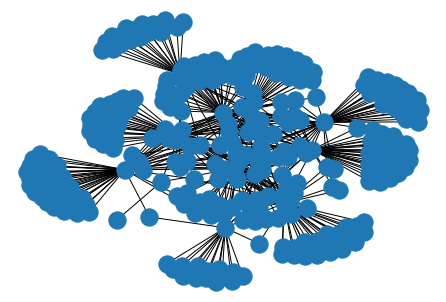

In [14]:
# Create a graph in networkx to find its degree distribution
G = nx.Graph()
G.add_edges_from([tuple(x) for x in save_data])
nx.draw(G)

### Degree Distribution

In [15]:
# Function to plot the degree distribution of a given graph
def plot_degree_dist(G):
    degrees = [G.degree(n) for n in G.nodes()]
    plt.hist(degrees)
    plt.xlabel("Degree")
    plt.ylabel("Frequency")
    plt.title("Degree Distribution")
    plt.show()

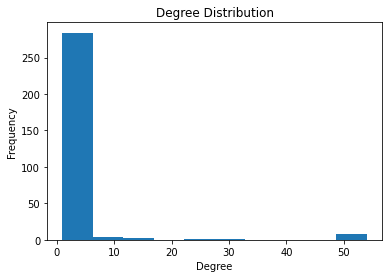

In [16]:
plot_degree_dist(G)

### All the other degree measure calculations and network visualizations are done in Gephi. Kindly refer to those files or see the results in the report. 